# Análise Exploratória - Notas do ENEM 2016

Essa é uma das etapas do desafio de entrada do *Bootcamp* da *Codenation*.

Aqui nessa parte do projeto irei fazer uma análise exploratória dos **dados dos participantes** do ENEM 2016.

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando as bases de dados

In [2]:
enem_treino=pd.read_csv("train.csv")

Visulaizando as colunas das nossas bases de dados.

In [3]:
enem_treino.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

Vemos que o número de colunas de treino e teste não são as mesma. Logo iremos excluir colunas da base de treino para ter o mesmo número de colunas. A **'NU_NOTA_MT'** não será excluída, pois será usada para treinar os algoritmos.

vamos criar uma lista apenas com as *features* que nos trazem informações dos participantes e as notas nas matérias.


#### Dados 

Vamos selecionar os dados dos participantes, dados da escola, dados das provas objetivas, dados da redação e dados do questionário sócioeconômico.

In [4]:
feature=['NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA','NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
         'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
         'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026',
         'Q027', 'Q028','Q029', 'Q030', 'Q031', 'Q032', 'Q033', 'Q034', 'Q035', 'Q036', 'Q037', 'Q038', 'Q039', 'Q040', 'Q041',
         'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049', 'Q050']

Agora vamos definí-las como colunas do *dataset* de treino.

In [5]:
enem_treino=enem_treino[feature]

visualizando as colunas novamente.

In [6]:
enem_treino.columns.values

array(['NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'Q026', 'Q027', 'Q028', 'Q029', 'Q030',
       'Q031', 'Q032

Pronto! Como podemos observar, agora a única diferença é que a base de treino tem a variável NU_NOTA_MT.

## Análise preliminar dos dados

Agora veremos a dimensão de cada base de dados.

In [7]:
print(enem_treino.shape)

(13730, 86)


Abaixo podemos ver informações sobre as nossas bases de dados.

In [8]:
print(enem_treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_ANO                   13730 non-null  int64  
 1   CO_MUNICIPIO_RESIDENCIA  13730 non-null  int64  
 2   SG_UF_RESIDENCIA         13730 non-null  object 
 3   NU_IDADE                 13730 non-null  int64  
 4   TP_SEXO                  13730 non-null  object 
 5   TP_ESTADO_CIVIL          13202 non-null  float64
 6   TP_COR_RACA              13730 non-null  int64  
 7   TP_NACIONALIDADE         13730 non-null  int64  
 8   CO_MUNICIPIO_NASCIMENTO  13121 non-null  float64
 9   NO_MUNICIPIO_NASCIMENTO  13121 non-null  object 
 10  CO_UF_NASCIMENTO         13121 non-null  float64
 11  SG_UF_NASCIMENTO         13121 non-null  object 
 12  TP_ST_CONCLUSAO          13730 non-null  int64  
 13  TP_ANO_CONCLUIU          13730 non-null  int64  
 14  TP_ESCOLA             

Vemos que temos algumas variáveis que possuem muitos valores faltantes.

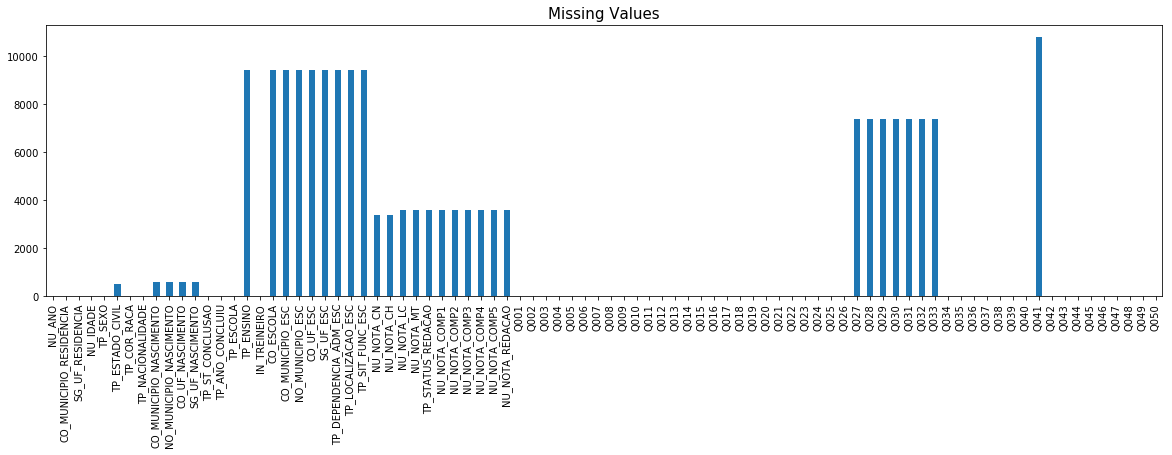

In [9]:
plt.figure(figsize=(20,5))
plt.title('Missing Values',size=15)
enem_treino.isna().sum().plot.bar();

Como podemos ver nas variáveis acima (tanto na base de treino como na de teste) há muitos valores faltantes. Há duas opções para resolvermos esse problema: exclusão das observações NAN's ou faremos um processo de imputação. Com a exclusão de valores faltantes não houveram bons resultados dos modelos utilizados e não consegui chegar no score mínimo de 90% para passar no desafio da Codenation. Dessa forma segui por outro caminho que foi a imputação dos valores faltantes.

No processo de imputação há algumas alternativas que são:

**1)** substituir os valores NAN's por uma constante;

**2)** Substituir os valores NAN's pela média;

**3)** Substituir os valores NAN's pela mediana;

**4)** Substituir os valores NAN's pela moda

Como os valores faltantes não são discretos, podemos usar as opções 1,2 e 3.

Para esse trabalho optei por substituir por uma constante que foi **0 (zero)**, já que estamos falando de alunos que faltaram a essas provas, sendo assim, a nota a eles atribuída é zero.

Imputando os valores faltantes por zero.

In [10]:
enem_treino.select_dtypes('object').columns

Index(['SG_UF_RESIDENCIA', 'TP_SEXO', 'NO_MUNICIPIO_NASCIMENTO',
       'SG_UF_NASCIMENTO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027', 'Q028', 'Q042', 'Q043',
       'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049', 'Q050'],
      dtype='object')

In [11]:
enem_treino.select_dtypes('object').isna().sum()

SG_UF_RESIDENCIA              0
TP_SEXO                       0
NO_MUNICIPIO_NASCIMENTO     609
SG_UF_NASCIMENTO            609
NO_MUNICIPIO_ESC           9448
SG_UF_ESC                  9448
Q001                          0
Q002                          0
Q003                          0
Q004                          0
Q006                          0
Q007                          0
Q008                          0
Q009                          0
Q010                          0
Q011                          0
Q012                          0
Q013                          0
Q014                          0
Q015                          0
Q016                          0
Q017                          0
Q018                          0
Q019                          0
Q020                          0
Q021                          0
Q022                          0
Q023                          0
Q024                          0
Q025                          0
Q026                          0
Q027    

Vemos que as variáveis **TP_SEXO, NO_MUNICIPIO_NASCIMENTO, SG_UF_NASCIMENTO, NO_MUNICIPIO_ESC, SG_UF_ESC, Q027** e **Q028** possuem muitos valores faltantes. Não posso simplesmente substituir esses valores pela moda, pois eu estaria inserindo informação de uma única classe e isso influenciaria os resultados, por isso não farei nenhum processo de imputação.

Abaixo podemos ver que as *features* do tipo *float64* também possuem muitos valores faltantes, mas em algumas podemos fazer um processo de imputação, como no caso das notas das provas. Se não tem a nota das provas é porque o aluno faltou, então significa que a sua nota foi zero.

In [12]:
enem_treino.select_dtypes('float64').isna().sum()

TP_ESTADO_CIVIL              528
CO_MUNICIPIO_NASCIMENTO      609
CO_UF_NASCIMENTO             609
TP_ENSINO                   9448
CO_ESCOLA                   9448
CO_MUNICIPIO_ESC            9448
CO_UF_ESC                   9448
TP_DEPENDENCIA_ADM_ESC      9448
TP_LOCALIZACAO_ESC          9448
TP_SIT_FUNC_ESC             9448
NU_NOTA_CN                  3389
NU_NOTA_CH                  3389
NU_NOTA_LC                  3597
NU_NOTA_MT                  3597
TP_STATUS_REDACAO           3597
NU_NOTA_COMP1               3597
NU_NOTA_COMP2               3597
NU_NOTA_COMP3               3597
NU_NOTA_COMP4               3597
NU_NOTA_COMP5               3597
NU_NOTA_REDACAO             3597
Q029                        7375
Q030                        7375
Q031                        7376
Q032                        7376
Q033                        7376
Q041                       10792
dtype: int64

Já os dados do tipo *int64* não possuem valores faltantes.

In [13]:
enem_treino.select_dtypes('int64').isna().sum()

NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NU_IDADE                   0
TP_COR_RACA                0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
IN_TREINEIRO               0
Q005                       0
Q034                       0
Q035                       0
Q036                       0
Q037                       0
Q038                       0
Q039                       0
Q040                       0
dtype: int64

## Análise dos dados dos participantes

As variáveis com os dados dos participantes são : 

1) **SG_UF_RESIDENCIA** (Sigla da Unidade da Federação de residência);

2) **NU_IDADE** (Idade);

3) **TP_SEXO** (Sexo);

4) **TP_ESTADO_CIVIL** (Estado Civil);

5) **TP_COR_RACA** (Raça);

6) **TP_NACIONALIDADE** (Nacionalidade);

7) **SG_UF_NASCIMENTO** (Sigla da Unidade da Federação de nascimento do participante);

8) **TP_ST_CONCLUSAO** (Situação de conclusão do Ensino Médio);

9) **TP_ANO_CONCLUIU** (Ano que concluiu o Ensino Médio);

10) **TP_ESCOLA** (Tipo de Escola);

11) **TP_ENSINO** (Tipo de Ensino);

12) **IN_TREINEIRO** (Se é ou não treineiro)

Vamos olhar o desempenho das notas de cada uma dessas características.

Criarei uma *feature* que será a soma das nota de todas as provas do ENEM.

In [14]:
enem_treino['NOTA_TOTAL']=enem_treino['NU_NOTA_CN']+enem_treino['NU_NOTA_CH']+enem_treino['NU_NOTA_LC']+enem_treino['NU_NOTA_MT']+enem_treino['NU_NOTA_REDACAO']

Vemos que a maior parte dos alunos são dos estados de São Paulo, Ceará e Minas Gerais.

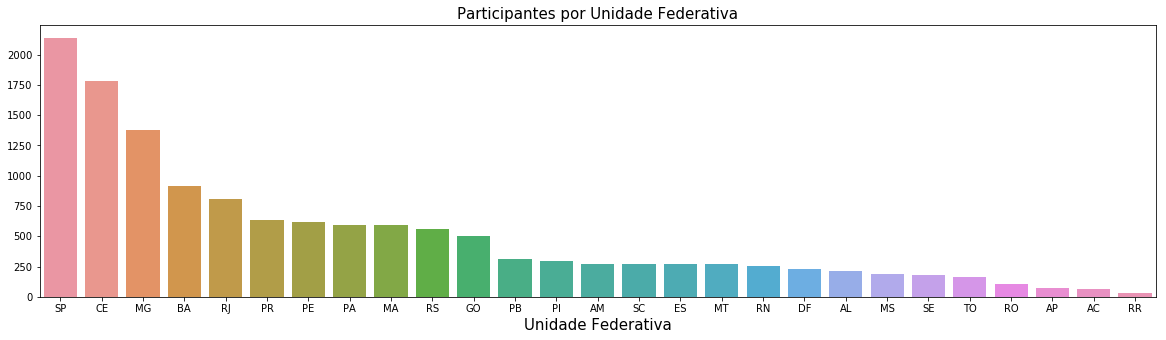

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['SG_UF_RESIDENCIA'],order =
              enem_treino['SG_UF_RESIDENCIA'].value_counts(ascending=False).index)
plt.ylabel('')
plt.xlabel("Unidade Federativa",size=15)
plt.title("Participantes por Unidade Federativa",size=15);

Média das notas dos alunos por Unidade Federativa.

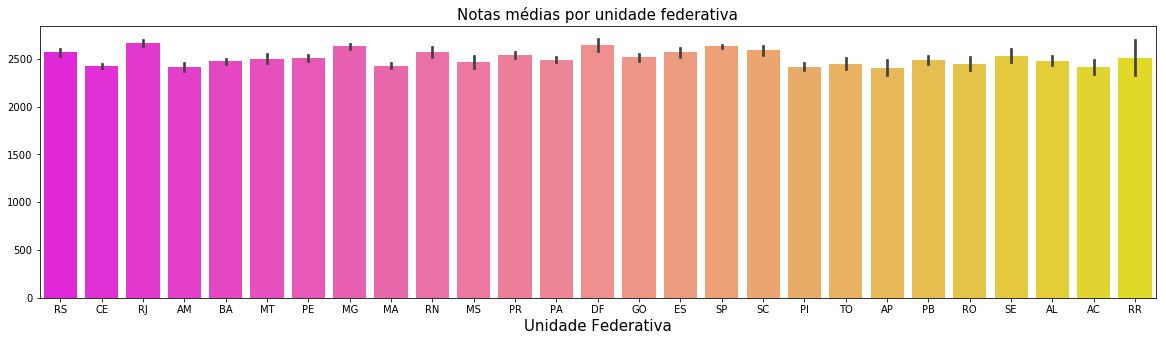

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x='SG_UF_RESIDENCIA', y='NOTA_TOTAL', data=enem_treino, palette='spring')
plt.xlabel('Unidade Federativa',size=15)
plt.ylabel('')
plt.title('Notas médias por unidade federativa',size=15);

Quanto a idade, vemos que a maioria dos participantes estão entre 16 a 21 anos de idade. A distribuição mostra que a maior parte dos participantes estão abaixo da idade de 20 anos.

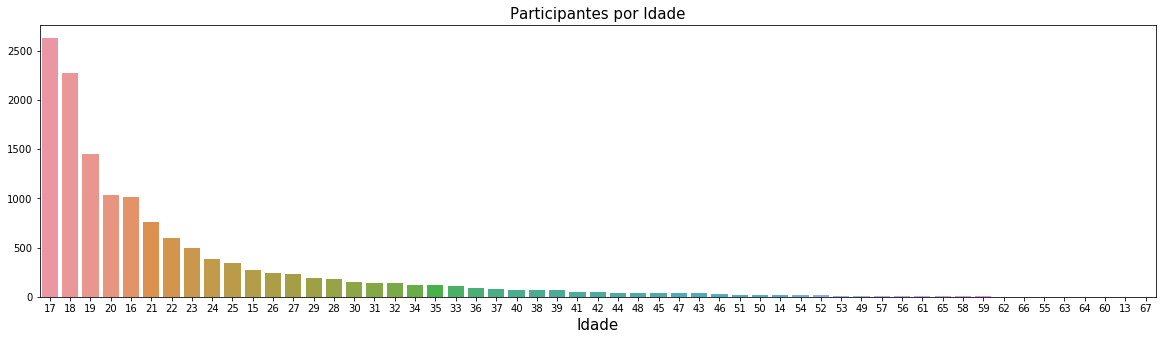

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['NU_IDADE'],order =
              enem_treino['NU_IDADE'].value_counts(ascending=False).index)
plt.ylabel('')
plt.xlabel("Idade",size=15)
plt.title("Participantes por Idade",size=15);

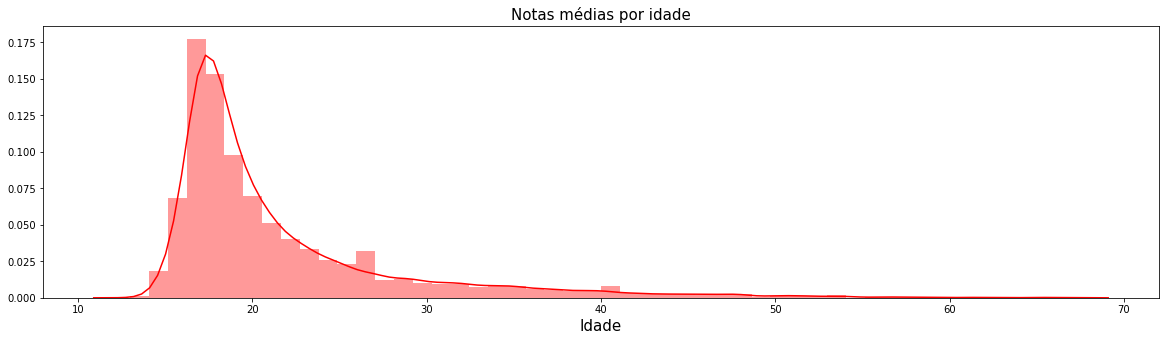

In [18]:
plt.figure(figsize=(20,5))
sns.distplot(enem_treino['NU_IDADE'], color='red')
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.title('Notas médias por idade',size=15);

Notas totais médias por idade.

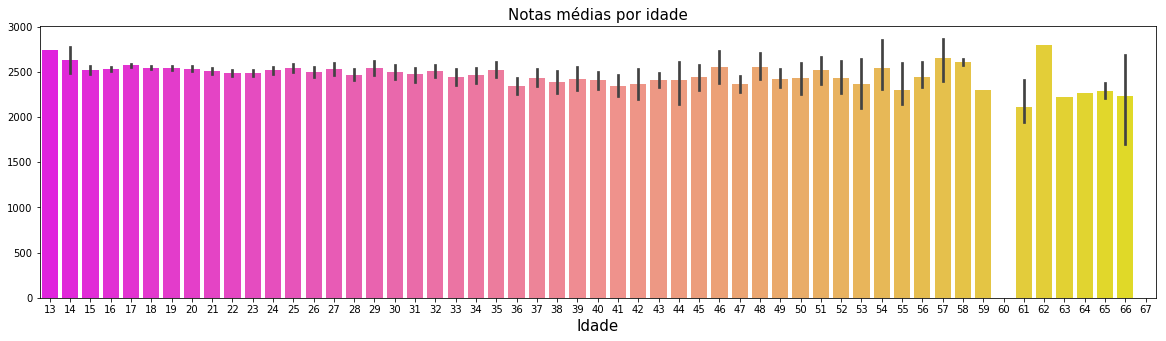

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(x='NU_IDADE', y='NOTA_TOTAL', data=enem_treino, palette='spring')
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.title('Notas médias por idade',size=15);

Vemos que a medida que a idade aumenta o número de *outliers* vai caindo. Alunos mais novos possuem uma média mais próxima, enquanto a média das notas entre os mais velhores é mais distinta.

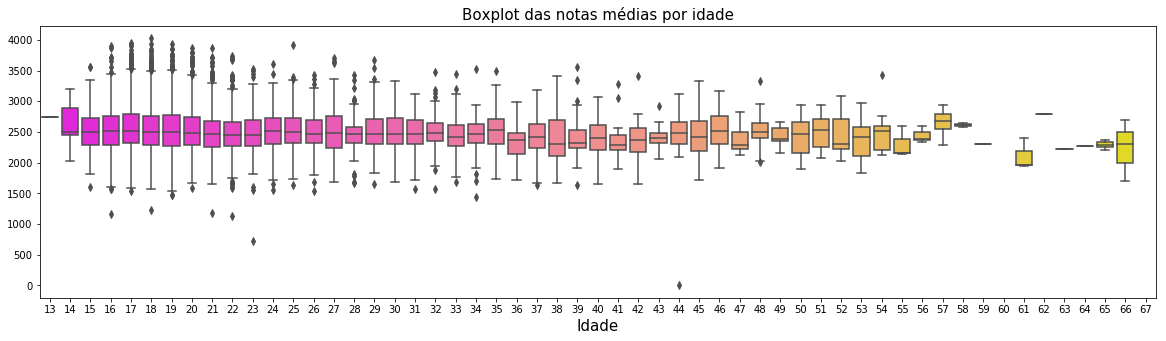

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x='NU_IDADE', y='NOTA_TOTAL', data=enem_treino, palette='spring')
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.title('Boxplot das notas médias por idade',size=15);

A maior parte dos participantes são do sexo feminino.

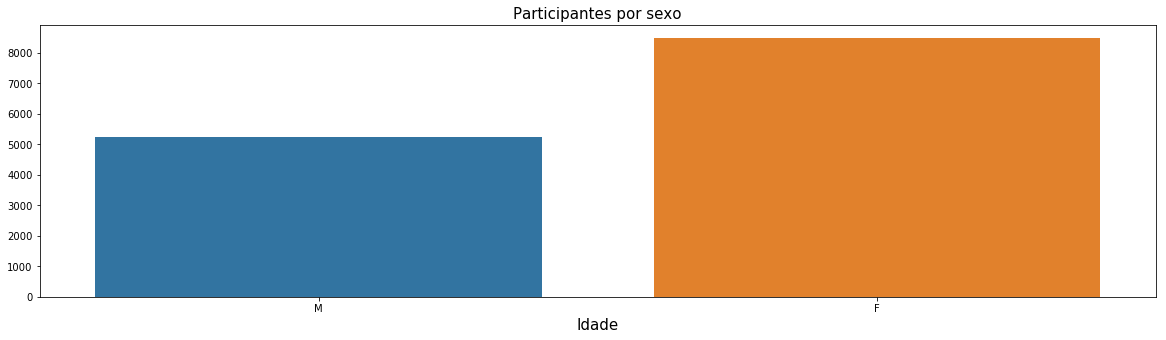

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_SEXO'])
plt.ylabel('')
plt.xlabel("Idade",size=15)
plt.title("Participantes por sexo",size=15);

Podemos ver que mesmo os número de participantes do sexo feminino sendo maior a maioria, em média, a nota desse grupo é ligeiramente menor que a do sexo masculino.

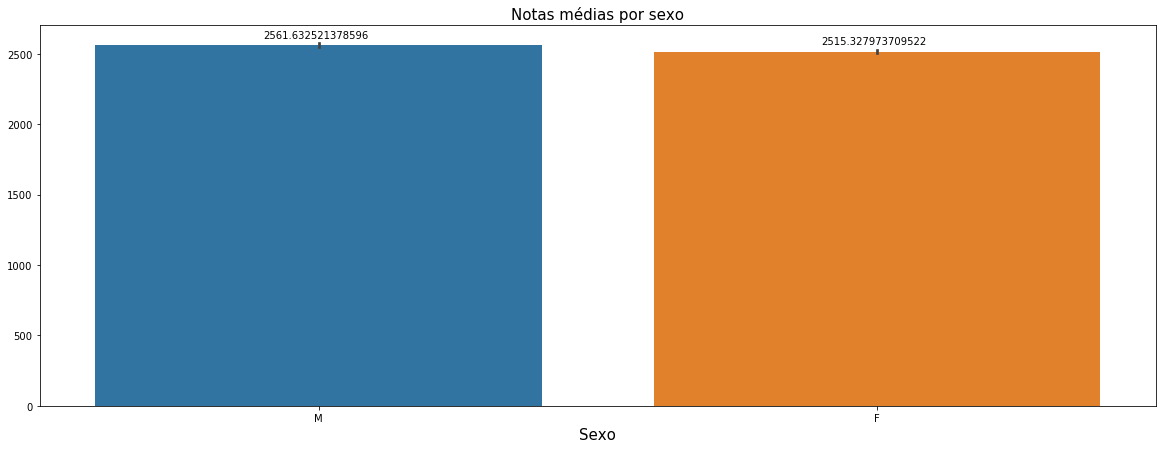

In [22]:
plt.figure(figsize=(20,7))
bx=sns.barplot(x='TP_SEXO', y='NOTA_TOTAL', data=enem_treino)
plt.xlabel('Sexo',size=15)
plt.ylabel('')
plt.title('Notas médias por sexo',size=15)

for p in bx.patches:
    bx.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

Abaixo o significado de cada número:

0 - Solteiro(a);

1 - Casado(a)/Mora com companheiro(a);

2 - Divorciado(a)/Desquitado(a)/Separado(a);

3 - Viúvo(a).

A grande maioria dos participantes são casados.

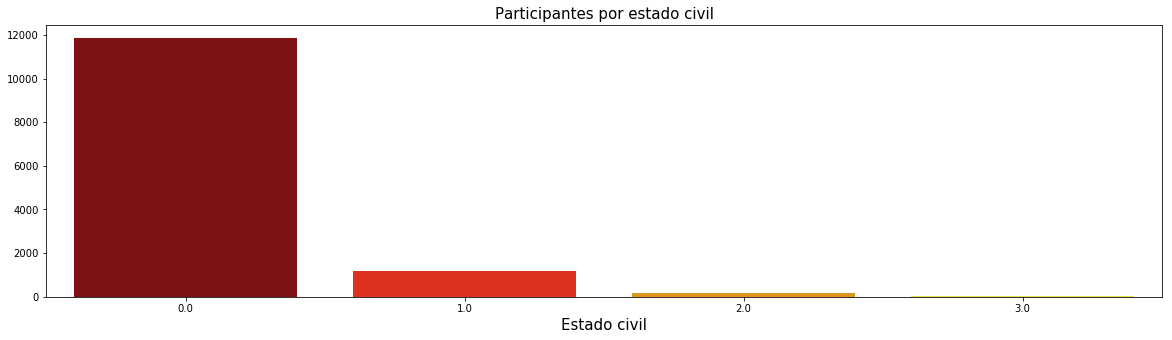

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_ESTADO_CIVIL'],palette='hot')
plt.ylabel('')
plt.xlabel("Estado civil",size=15)
plt.title("Participantes por estado civil",size=15);

Solteiros tem um desempenho melhor que os demais estados civis, o fato de ser solteiro permite que tenham mais tempo para focar nos estudos para realização do Exame.

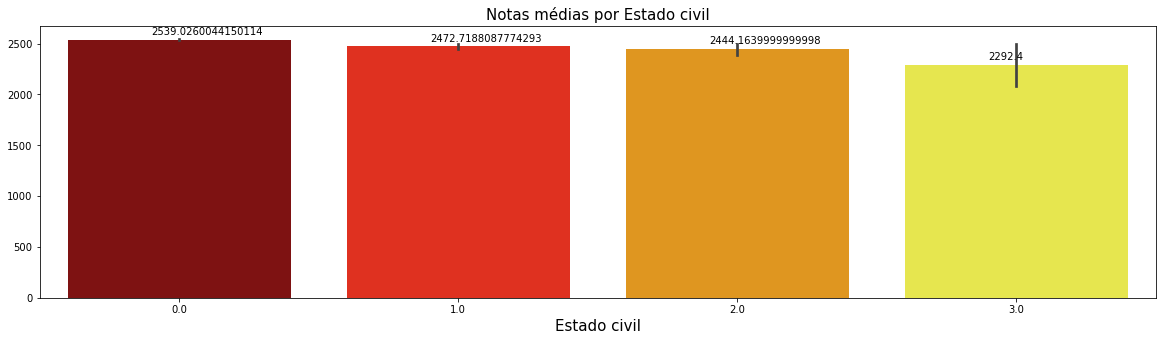

In [24]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='TP_ESTADO_CIVIL', y='NOTA_TOTAL', data=enem_treino, palette='hot')
plt.xlabel('Estado civil',size=15)
plt.ylabel('')
plt.title('Notas médias por Estado civil',size=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show();

O significado dos valores para variável **TP_COR_RACA**:

0 - Não declarado;

1 - Branca;

2 - Preta;

3 - Parda;

4 - Amarela;

5 - Indígena;

6 - Não dispõe da informação.

A maior parte dos participantes são pardos, brancos e negros, respectivamente.

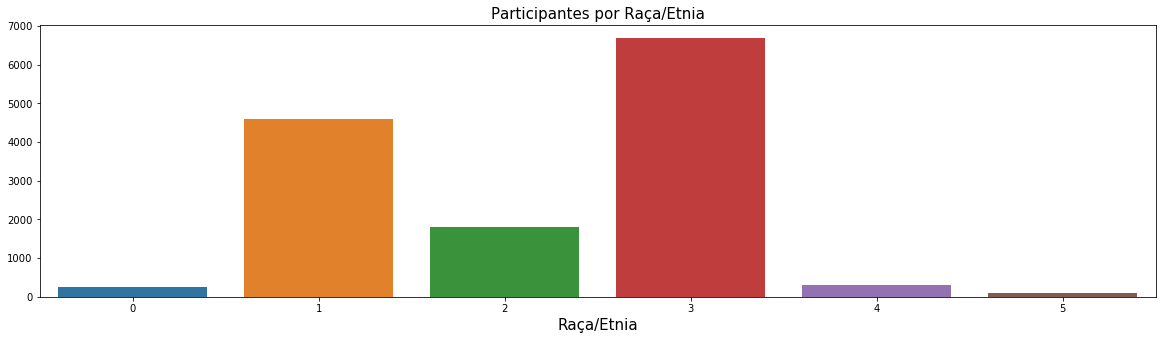

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_COR_RACA'])
plt.ylabel('')
plt.xlabel("Raça/Etnia",size=15)
plt.title("Participantes por Raça/Etnia",size=15);

Brancos e Amarelos possuem os melhores desempenhos entre as raças.

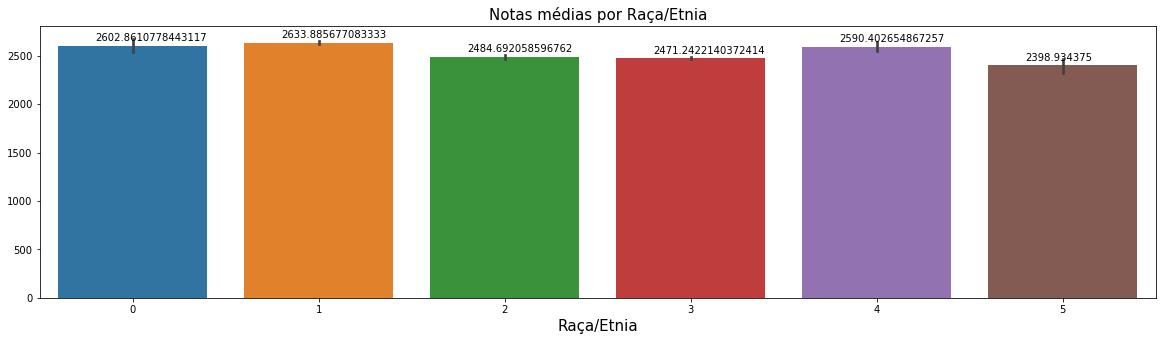

In [26]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='TP_COR_RACA', y='NOTA_TOTAL', data=enem_treino)
plt.xlabel('Raça/Etnia',size=15)
plt.ylabel('')
plt.title('Notas médias por Raça/Etnia',size=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))
plt.show();

Agora vamos analisar as notas por Nacionalidade (**TP_NACIONALIDADE**). Abaixo podemos ver o significado de cada código dessa *feature*:

0 - Não informado;

1 - Brasileiro(a);

2 - Brasileiro(a) Naturalizado(a);

3 - Estrangeiro(a);

4 - Brasileiro(a) Nato(a), nascido(a) no exterior.

Abaixo podemos ver que a esmagadora maioria é de brasileiros, depois uma minoria composta por brasileiros naturalizados e nascidos no exterior.

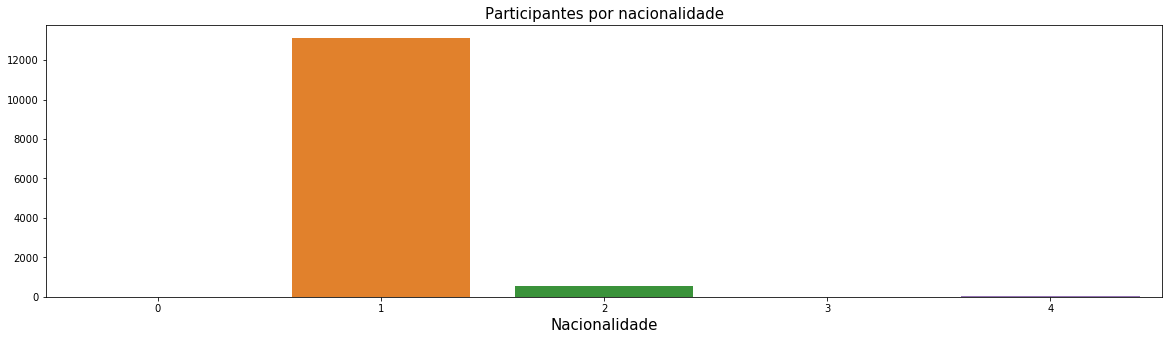

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_NACIONALIDADE'])
plt.ylabel('')
plt.xlabel("Nacionalidade",size=15)
plt.title("Participantes por nacionalidade",size=15);

Porém a maior média são daqueles que são estrangeiros.

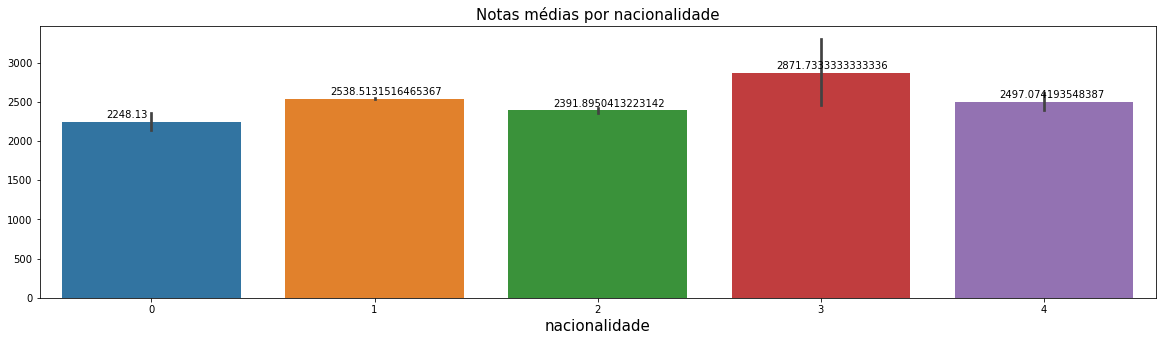

In [28]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='TP_NACIONALIDADE', y='NOTA_TOTAL', data=enem_treino)
plt.xlabel('nacionalidade',size=15)
plt.ylabel('')
plt.title('Notas médias por nacionalidade',size=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))
plt.show();

Veremos como foi o desempenho dos participantes por situação de conclusão do Ensino Médio (**TP_ST_CONCLUSAO**). Abaixo podemos ver a codificação:

1 - Já concluí o Ensino Médio;

2 - Estou cursando e concluirei o Ensino Médio em 2016;

3 - Estou cursando e concluirei o Ensino Médio após 2016;

4 - Não concluí e não estou cursando o Ensino Médio.

A grande maioria dos alunos já concluiu o Ensino Médio, conforme podemos ver abaixo.

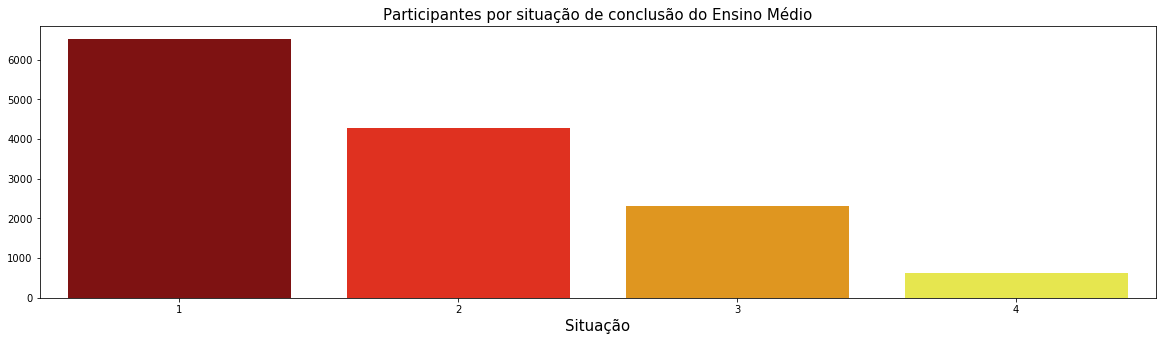

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_ST_CONCLUSAO'],palette='hot')
plt.ylabel('')
plt.xlabel("Situação",size=15)
plt.title("Participantes por situação de conclusão do Ensino Médio",size=15);

Os que já concluíram o ensino médio obtiveram maiores médias.

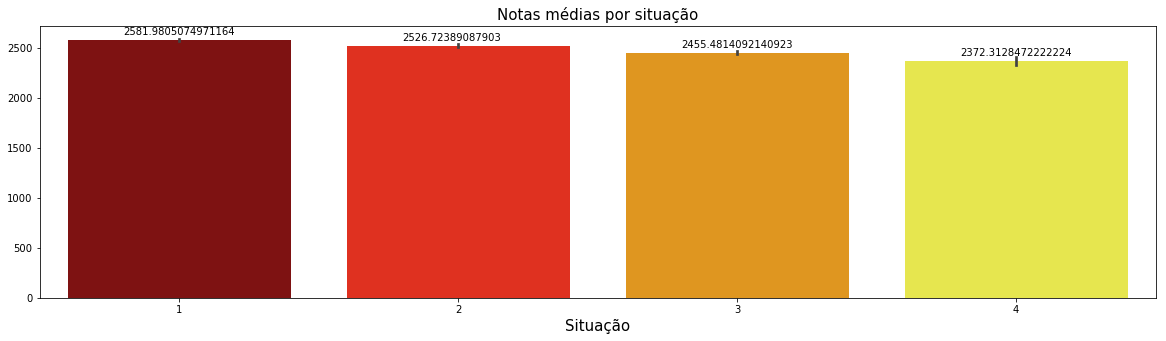

In [33]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='TP_ST_CONCLUSAO', y='NOTA_TOTAL', data=enem_treino,palette='hot')
plt.xlabel('Situação',size=15)
plt.ylabel('')
plt.title('Notas médias por situação',size=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))
plt.show();

Desempenho dos participantes por ano de conclusão.

0 - Não informado;

1 - 2015;

2 - 2014;

3 - 2013;

4 - 2012;

5 - 2011;

6 - 2010;

7 - 2009;

8 - 2008;

9 - 2007;

10 - Anterior a 2007.

Abaixo vemos que a grande maioria não informou o ano de conclusão do ensino médio.

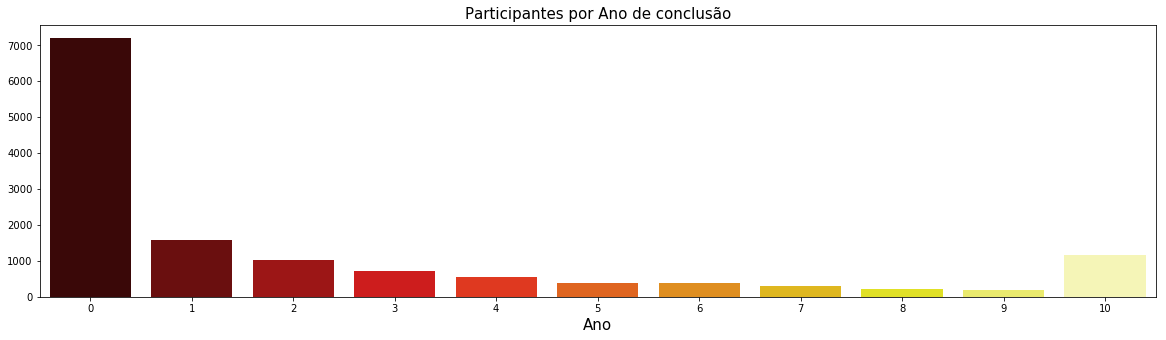

In [35]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_ANO_CONCLUIU'],palette='hot')
plt.ylabel('')
plt.xlabel("Ano",size=15)
plt.title("Participantes por Ano de conclusão",size=15);

Não parece haver muita diferença das notas médias por ano de conclusão, com exceção daqueles que não informaram o ano em que concluíram o ensino médio.

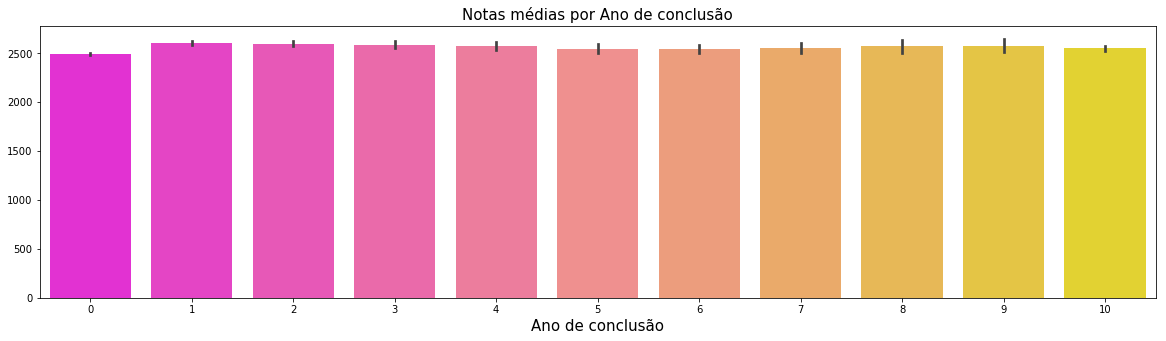

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x='TP_ANO_CONCLUIU', y='NOTA_TOTAL', data=enem_treino, palette='spring')
plt.xlabel('Ano de conclusão',size=15)
plt.ylabel('')
plt.title('Notas médias por Ano de conclusão',size=15);

Desempenho dos participantes por tipo de escola.

1 - Não Respondeu;

2 - Pública;

3 - Privada;

4 - Exterior;

A grande maioria não respondeu qual o tipo de escola que estudam/ estudaram. Vemos que a maior parte dos participantes são provenientes de escolas públicas.

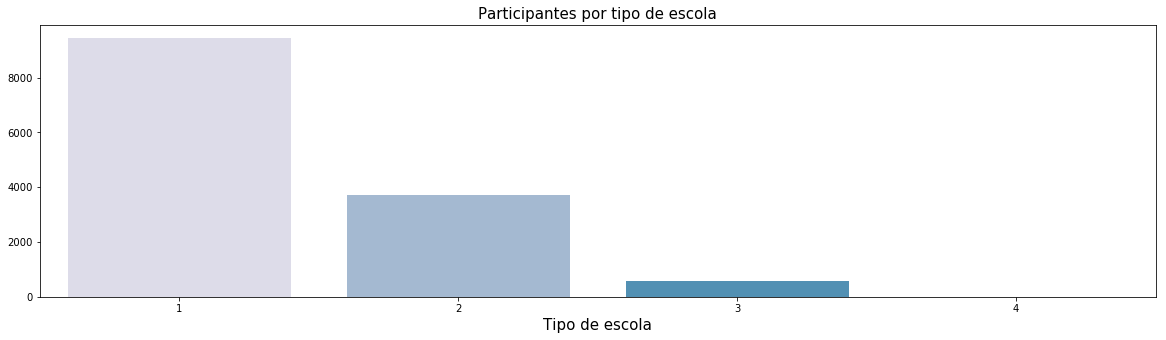

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_ESCOLA'],palette='PuBu')
plt.ylabel('')
plt.xlabel("Tipo de escola",size=15)
plt.title("Participantes por tipo de escola",size=15);

Entretanto a maior nota média são dos participantes que são provenientes de escolas privadas/particulares.

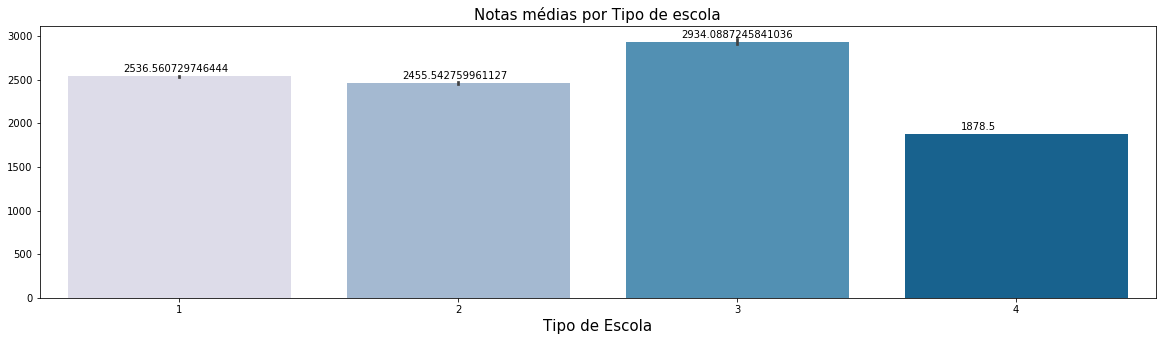

In [39]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='TP_ESCOLA', y='NOTA_TOTAL', data=enem_treino,palette='PuBu')
plt.xlabel('Tipo de Escola',size=15)
plt.ylabel('')
plt.title('Notas médias por Tipo de escola',size=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))
plt.show();

Desempenho dos participantes por tipo de ensino.

1 - Ensino Regular;

2 - Educação Especial - Modalidade Substitutiva;

3 - Educação de Jovens e Adultos.


A expressa maioria vieram do ensino regular.

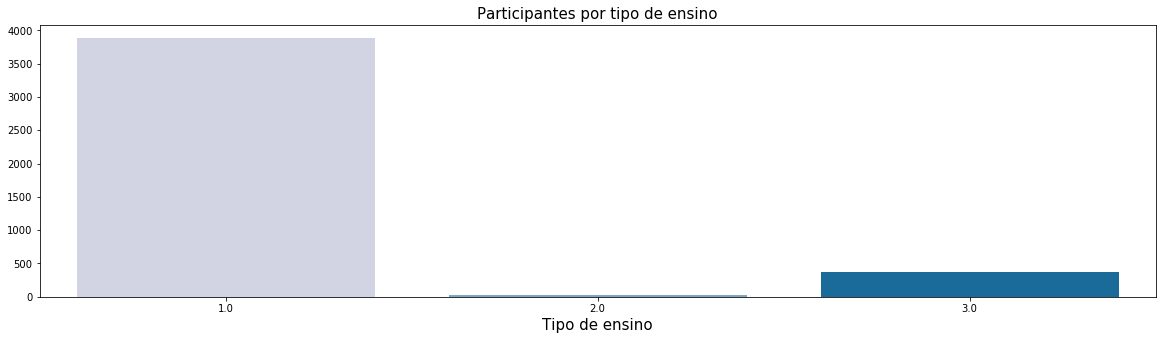

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['TP_ENSINO'],palette='PuBu')
plt.ylabel('')
plt.xlabel("Tipo de ensino",size=15)
plt.title("Participantes por tipo de ensino",size=15);

E as maiores médias de notas são dos alunos do ensino regular (mais de 100 pontos acima dos outros tipos de ensino).

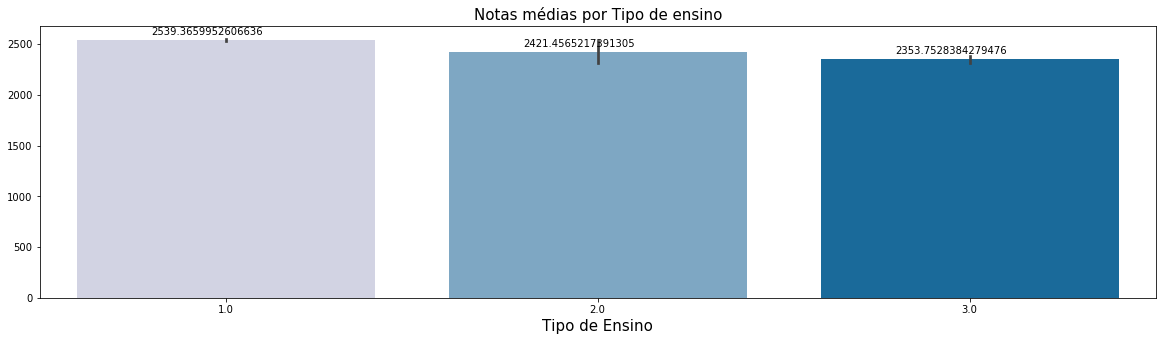

In [41]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='TP_ENSINO', y='NOTA_TOTAL', data=enem_treino,palette='PuBu')
plt.xlabel('Tipo de Ensino',size=15)
plt.ylabel('')
plt.title('Notas médias por Tipo de ensino',size=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))
plt.show();

Por fim, vamos analisar o desempenho dos participantes que são ou não treineiros (que fazem a prova apenas para obter experiência). Caso seja treineiro o valor será 1, se não for o valor será 0.

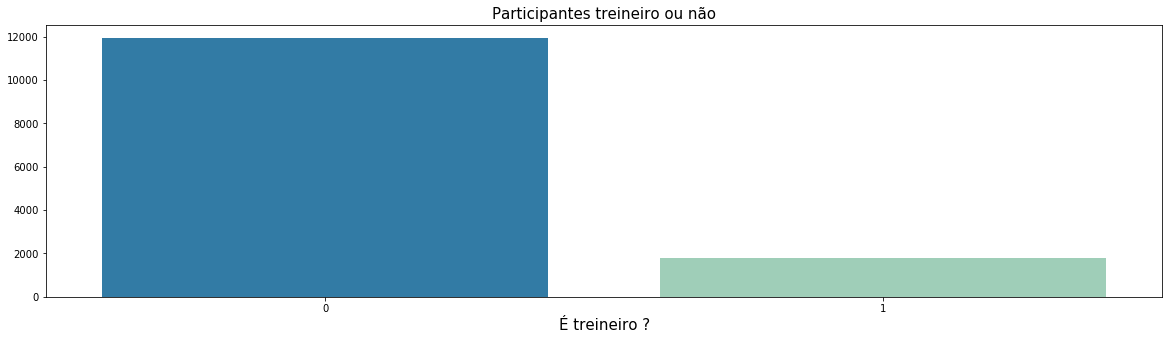

In [45]:
plt.figure(figsize=(20,5))
sns.countplot(enem_treino['IN_TREINEIRO'],palette='YlGnBu_r')
plt.ylabel('')
plt.xlabel("É treineiro ?",size=15)
plt.title("Participantes treineiro ou não",size=15);

Mesmo a grande parte dos participantes não sendo treineiros, vemos que não há uma diferença significativa entre as notas médias desses grupos.

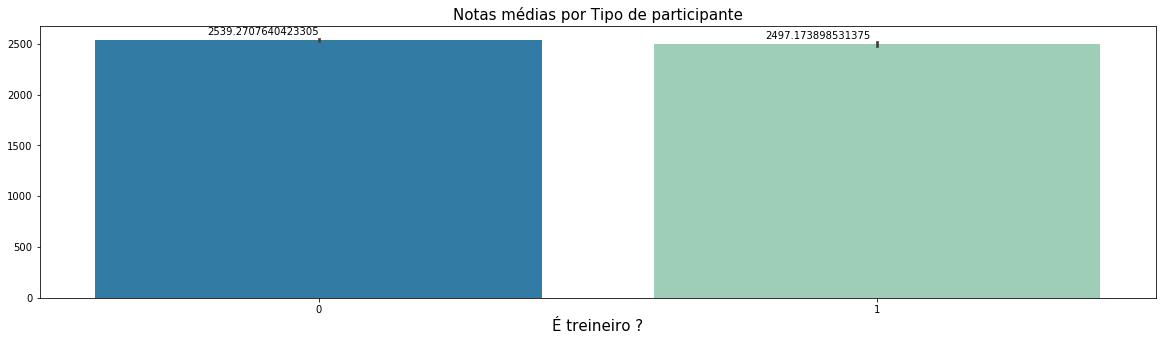

In [47]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='IN_TREINEIRO', y='NOTA_TOTAL', data=enem_treino,palette='YlGnBu_r')
plt.xlabel("É treineiro ?",size=15)
plt.ylabel('')
plt.title('Notas médias por Tipo de participante',size=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))
plt.show();

## Conclusão

Essa análise exploratória visou apenas analisar os dados dos participantes do ENEM 2016. Pode-se ver que notas médias mais altas estão mais associadas a participantes (não treineiros)  pardos/brancos, do sexo masculino, que já concluíram o ensino médio em escolas particulares de ensino regular.

Em outras análises podemos observar os desempenho com base em outras variáveis, como os dados das escolas e questões sócioeconômicas.